## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model = build_mlp()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:

"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.9347 - acc: 0.3002 - val_loss: 1.8115 - val_acc: 0.3653
Epoch 2/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7049 - acc: 0.3885 - val_loss: 1.6659 - val_acc: 0.4009
Epoch 3/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6210 - acc: 0.4174 - val_loss: 1.5928 - val_acc: 0.4280
Epoch 4/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5574 - acc: 0.4405 - val_loss: 1.5379 - val_acc: 0.4502
Epoch 5/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5100 - acc: 0.4590 - val_loss: 1.5174 - val_acc: 0.4579
Epoch 6/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.4743 - acc: 0.4740 - val_loss: 1.4725 - val_acc: 0.4784
Epoch 7/500
50000/50000 [==============================] - 3s 59us/step -

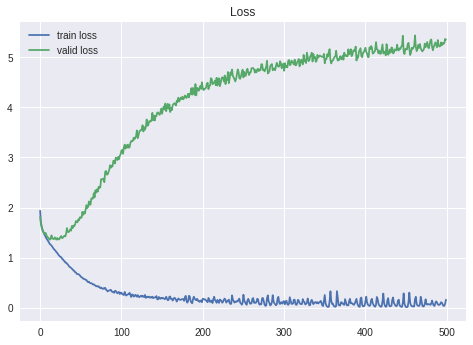

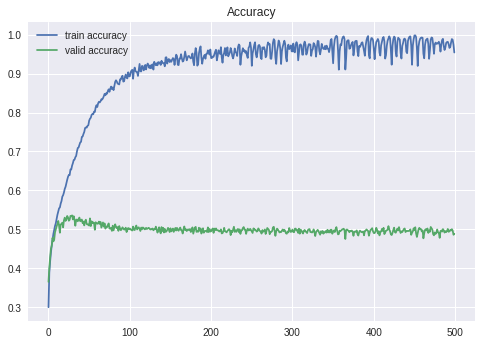

In [10]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [0]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1181 - acc: 0.9647 - val_loss: 5.1996 - val_acc: 0.4941
Epoch 2/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.0641 - acc: 0.9802 - val_loss: 5.1805 - val_acc: 0.4976
Epoch 3/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0442 - acc: 0.9863 - val_loss: 5.1689 - val_acc: 0.4981
Epoch 4/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0337 - acc: 0.9901 - val_loss: 5.1678 - val_acc: 0.4986
Epoch 5/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.0272 - acc: 0.9922 - val_loss: 5.1656 - val_acc: 0.4988
Epoch 6/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.0228 - acc: 0.9936 - val_loss: 5.1669 - val_acc: 0.4990
Epoch 7/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0198 - acc: 0.9947 - val_loss: 5.1701 - 

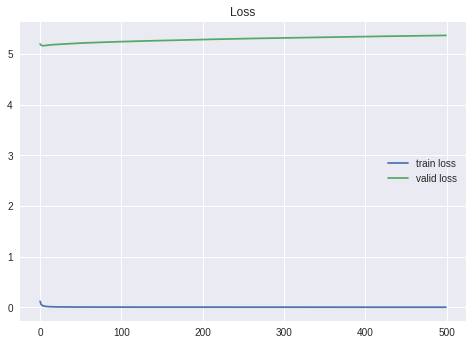

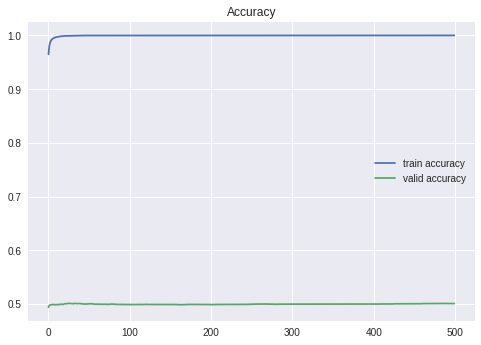

In [13]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()